In [3]:
!pip install -U gdown

import gdown

file_id = "1gxd_KAuhRNCVu3DSAXHeaB9CLHUUHoN2"
gdown.download(f"https://drive.google.com/uc?id={file_id}", quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1gxd_KAuhRNCVu3DSAXHeaB9CLHUUHoN2
To: /content/Crash Severity Analysis Traffic Crash Data 2013-2023_ND.csv
100%|██████████| 42.7M/42.7M [00:00<00:00, 148MB/s]


'Crash Severity Analysis Traffic Crash Data 2013-2023_ND.csv'

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [5]:
import pandas as pd
df = pd.read_csv("Crash Severity Analysis Traffic Crash Data 2013-2023_ND.csv")
df.head()

,CRASH_NO,COUNTY,COUNTY_DESCR,LIGHT,LIGHT_DESCR,WEATHER,WEATHER_DESCR,ROAD_COND,ROAD_COND_DESCR,SURFACE_COND,...,OP_AGE_D1,OP_SEX_D1,ALCOHOL_DRUG_DESCR_D1,SAFETY_EQUIP_DESCR_V1,CONTRIB_FACT_DESCR_D1,SPEED_LIMIT_D1,OP_AGE_D2,OP_SEX_D2,SPEED_LIMIT_D2,CRASH_HOUR
0,268143,30,Morton,4,Dark(Road Lighted),4,Snow,1,Normal,4,...,19.0,M,Neither Present,Restraint Use Unknown,Failed to Yield,35.0,47.0,M,35.0,18
1,268145,30,Morton,4,Dark(Road Lighted),4,Snow,1,Normal,4,...,43.0,M,Yes (Alcohol),Restraint Use Unknown,Fail Keep in Proper Lane,25.0,NaN,NaN,NaN,1
2,268149,9,Cass,1,Daylight,1,Clear,1,Normal,6,...,32.0,M,Neither Present,Lap and Shoulder,Driving Left of Center,15.0,21.0,M,15.0,15
3,268154,13,Dunn,1,Daylight,1,Clear,1,Normal,4,...,49.0,M,Neither Present,Lap and Shoulder,Vision Obstructed,NaN,44.0,M,NaN,12
4,268159,52,Wells,4,Dark(Road Lighted),4,Snow,1,Normal,4,...,32.0,F,Neither Present,Restraint Use Unknown,Improper Backing/Turning,25.0,NaN,NaN,NaN,20


In [ ]:
df.shape

(147615, 43)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147615 entries, 0 to 147614
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CRASH_NO                    147615 non-null  int64  
 1   COUNTY                      147615 non-null  int64  
 2   COUNTY_DESCR                147615 non-null  object 
 3   LIGHT                       147615 non-null  int64  
 4   LIGHT_DESCR                 147615 non-null  object 
 5   WEATHER                     147615 non-null  int64  
 6   WEATHER_DESCR               147615 non-null  object 
 7   ROAD_COND                   147615 non-null  int64  
 8   ROAD_COND_DESCR             147615 non-null  object 
 9   SURFACE_COND                147615 non-null  int64  
 10  SURFACE_COND_DESCR          147615 non-null  object 
 11  RELATION_TO_JUNCTI          147615 non-null  int64  
 12  RELATION_TO_JUNCTI_DESCR    147615 non-null  object 
 13  CRASH_SEVERITY

### Feature Drop

---

Many columns in the dataset contain descriptive text related to counties, equipment, surface conditions, crash severity, and other features. These description fields often duplicate information already represented in other columns. Moreover, descriptive text can vary between data sources or individuals, reducing the consistency and generalizability of the model. Therefore, these columns are dropped to streamline the dataset and focus on standardized inputs.

In [ ]:
columns_to_drop = [
    'CRASH_NO', 'COUNTY_DESCR', 'LIGHT_DESCR', 'WEATHER_DESCR',
    'ROAD_COND_DESCR', 'SURFACE_COND_DESCR', 'RELATION_TO_JUNCTI_DESCR',
    'CRASH_SEVERITY_DESCR', 'INTER_TYPE_DESCR', 'MANNER_OF_COLL_DESCR',
    'ROAD_GEOM_DESCR', 'FROM_INTERSECTION', 'TO_INTERSECTION', 'TRAFFIC_CONTROL_DESCR_V1',
    'ALCOHOL_TEST_DESCR_D1', 'SAFETY_EQUIP_DESCR_V1'
]

df2 = df.drop(columns=columns_to_drop)
# Display the first few rows of the updated DataFrame
print(df2.head())
print(df2.info())

   COUNTY  LIGHT  WEATHER  ROAD_COND  SURFACE_COND  RELATION_TO_JUNCTI  \
0      30      4        4          1             4                   1   
1      30      4        4          1             4                   2   
2       9      1        1          1             6                   1   
3      13      1        1          1             4                   2   
4      52      4        4          1             4                   1   

   CRASH_SEVERITY  INTER_TYPE  MANNER_OF_COLL  ROAD_GEOM  ...  \
0               3           1               4          1  ...   
1               2           3               7          1  ...   
2               3           1               3          3  ...   
3               3           2               4          2  ...   
4               3           1               7          1  ...   

   UNBELTED_VEHICLE_OCCUPANTS  OP_AGE_D1 OP_SEX_D1 ALCOHOL_DRUG_DESCR_D1  \
0                         No        19.0         M       Neither Present   
1           

In [ ]:
df = df2.copy()

In [ ]:
# Calculate the number of unique values for each column
unique_counts = df.nunique().reset_index()
unique_counts.columns = ['Column', 'Unique Count']

# Display the table
unique_counts


,Column,Unique Count
0,COUNTY,53
1,LIGHT,7
2,WEATHER,10
3,ROAD_COND,9
4,SURFACE_COND,10
5,RELATION_TO_JUNCTI,10
6,CRASH_SEVERITY,5
7,INTER_TYPE,7
8,MANNER_OF_COLL,11
9,ROAD_GEOM,6


In [ ]:
null_sum = df.isnull().sum()
print(null_sum)

COUNTY                            0
LIGHT                             0
WEATHER                           0
ROAD_COND                         0
SURFACE_COND                      0
RELATION_TO_JUNCTI                0
CRASH_SEVERITY                    0
INTER_TYPE                        0
MANNER_OF_COLL                    0
ROAD_GEOM                         0
LATITUDE                          0
LONGITUDE                         0
CRASH_DAY                         0
YOUNG_DRIVER_UNDER_21             0
SPEED_INVOLVED                    0
ALCOHOL_INVOLVED                  0
LANE_DEPARTURE                    0
UNBELTED_VEHICLE_OCCUPANTS        0
OP_AGE_D1                     10585
OP_SEX_D1                      3690
ALCOHOL_DRUG_DESCR_D1          3596
CONTRIB_FACT_DESCR_D1           192
SPEED_LIMIT_D1                 5698
OP_AGE_D2                     54492
OP_SEX_D2                     49508
SPEED_LIMIT_D2                44430
CRASH_HOUR                        0
dtype: int64


In [ ]:
df.columns

Index(['COUNTY', 'LIGHT', 'WEATHER', 'ROAD_COND', 'SURFACE_COND',
       'RELATION_TO_JUNCTI', 'CRASH_SEVERITY', 'INTER_TYPE', 'MANNER_OF_COLL',
       'ROAD_GEOM', 'LATITUDE', 'LONGITUDE', 'CRASH_DAY',
       'YOUNG_DRIVER_UNDER_21', 'SPEED_INVOLVED', 'ALCOHOL_INVOLVED',
       'LANE_DEPARTURE', 'UNBELTED_VEHICLE_OCCUPANTS', 'OP_AGE_D1',
       'OP_SEX_D1', 'ALCOHOL_DRUG_DESCR_D1', 'CONTRIB_FACT_DESCR_D1',
       'SPEED_LIMIT_D1', 'OP_AGE_D2', 'OP_SEX_D2', 'SPEED_LIMIT_D2',
       'CRASH_HOUR'],
      dtype='object')

In [ ]:
df['CRASH_SEVERITY'].value_counts()

,count
CRASH_SEVERITY,
3,111351
5,15966
2,15220
4,3964
1,1114


Drop nulls and rows that have unknown labels

In [ ]:
df = df[~df.eq("Unknown").any(axis=1)]


In [ ]:
df = df.dropna()

In [ ]:
df.shape

(84469, 27)

In [ ]:
df.isna().sum()

,0
COUNTY,0
LIGHT,0
WEATHER,0
ROAD_COND,0
SURFACE_COND,0
RELATION_TO_JUNCTI,0
CRASH_SEVERITY,0
INTER_TYPE,0
MANNER_OF_COLL,0
ROAD_GEOM,0


In [ ]:
for col in df.columns:
  print(f"Column: {col}")
  print(df[col].unique())
  print("-")

Column: COUNTY
[30  9  8 45 47 50 18 49 31 13 28 27 51  2 36 53 52 11 26  6 38 34 23 21
 29 16  7 20  5 32 39 37 15 40 35 33 17  4 12 19 14 10 25 41 42 44  1 46
 22  3 48 24 43]
-
Column: LIGHT
[4 1 2 3 5 0 6]
-
Column: WEATHER
[4 1 2 0 5 8 6 3 9 7]
-
Column: ROAD_COND
[1 2 9 4 8 5 6 7 3]
-
Column: SURFACE_COND
[4 6 7 1 2 5 3 0 9]
-
Column: RELATION_TO_JUNCTI
[ 1  2  5  8  3  4  9 10  7  6]
-
Column: CRASH_SEVERITY
[3 2 5 4 1]
-
Column: INTER_TYPE
[1 3 2 6 5 4 7]
-
Column: MANNER_OF_COLL
[ 4  3 10  1  2  5  9  8  7 11  6]
-
Column: ROAD_GEOM
[1 3 5 2 4 9]
-
Column: LATITUDE
[46.857044 46.874448 46.8276   ... 46.398385 46.354887 48.165514]
-
Column: LONGITUDE
[-100.923145  -96.881243 -100.880738 ...  -97.74183   -97.616052
  -97.615757]
-
Column: CRASH_DAY
['Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday' 'Monday']
-
Column: YOUNG_DRIVER_UNDER_21
['Yes' 'No ']
-
Column: SPEED_INVOLVED
['No ' 'Yes']
-
Column: ALCOHOL_INVOLVED
['No ' 'Yes']
-
Column: LANE_DEPARTURE
['No ' 'Ye

In [ ]:
df_ungrouped = df.copy()

## Feature Mapping

---
One of the major challenges in crash reporting is the presence of too many inconsistent or overlapping categories across different agencies. To address this, it's essential to define a set of distinct, standardized categories for each feature. Consolidating similar or redundant values into broader, well-defined groups enables the creation of a unified feature mapping framework. This standardization can significantly improve data consistency, model performance, and interoperability across agencies involved in crash reporting.

In [ ]:
# Define a dictionary for grouping
grouping = {
    'Distraction-Related': [
        'Attn Distracted-Inside', 'Attn Distracted-Outside', 'Attn Distracted-ECD', 'Attn Distracted-Other ED'
    ],
    'Speed-Related': [
        'To Fast for Conditions', 'Speed'
    ],
    'Right-of-Way Violations': [
        'Failed to Yield', 'Disregard Traffic Signs', 'Disregard Road Markings', 'Ran Red Light'
    ],
    'Improper Driving Maneuvers': [
        'Improper Turn', 'Improper Lane Change', 'Improper Backing/Turning',
        'Improper Evasive Action', 'Improper Overtaking'
    ],
    'Lane/Position Issues': [
        'Fail Keep in Proper Lane', 'Driving Left of Center', 'Wrong Way'
    ],
    'Environmental Factors': [
        'Weather', 'Animal in Roadway', 'Physical Obstruction', 'Vision Obstructed'
    ],
    'Equipment/Mechanical Issues': [
        'MV Mechanical Failure', 'Defective Equipment', 'TCD Not Working/Missing'
    ],
    'Reckless or Aggressive Driving': [
        'Careless/Reckless Driving', 'Following too Close', 'Over Correct/Steering'
    ]
}

# Create a reverse mapping to assign new groups to each value
reverse_mapping = {value: key for key, values in grouping.items() for value in values}

# Apply the mapping and replace the original column
df['CONTRIB_FACT_DESCR_D1'] = df['CONTRIB_FACT_DESCR_D1'].map(reverse_mapping).fillna('Other/Unknown Factors')


In [ ]:
df['CONTRIB_FACT_DESCR_D1'].value_counts()

,count
CONTRIB_FACT_DESCR_D1,
Other/Unknown Factors,27806
Reckless or Aggressive Driving,19014
Right-of-Way Violations,14543
Speed-Related,7477
Improper Driving Maneuvers,6450
Environmental Factors,4907
Lane/Position Issues,2835
Distraction-Related,796
Equipment/Mechanical Issues,641


In [ ]:
# Continue from the provided code
df = df[df['CONTRIB_FACT_DESCR_D1'] != 'Other/Unknown Factors']
df['CONTRIB_FACT_DESCR_D1'].value_counts()


,count
CONTRIB_FACT_DESCR_D1,
Reckless or Aggressive Driving,19014
Right-of-Way Violations,14543
Speed-Related,7477
Improper Driving Maneuvers,6450
Environmental Factors,4907
Lane/Position Issues,2835
Distraction-Related,796
Equipment/Mechanical Issues,641


In [ ]:
df.shape

(56663, 27)

In [ ]:
# Define a dictionary for grouping WEATHER with new numerical codes
weather_grouping = {
    1: [1, 2],  # Clear/Normal Weather
    2: [3, 4, 6],  # Rain/Snow Conditions
    3: [5, 8, 9, 7],  # Wind-Related Weather
    5: [0]  # Unknown Weather
}

# Create a reverse mapping where original values map to new numerical codes
weather_reverse_mapping = {value: group for group, values in weather_grouping.items() for value in values}

# Apply the mapping and drop the old column
df['WEATHER'] = df['WEATHER'].map(weather_reverse_mapping).fillna(5)



In [ ]:
# Drop rows where 'MANNER_OF_COLL' is equal to 5
df = df[df['WEATHER'] != 5]


In [ ]:
df['WEATHER'].value_counts()

,count
WEATHER,
1,48280
2,6182
3,1982


In [ ]:
# Define a dictionary for grouping LIGHT with new numerical codes
light_grouping = {
    1: [1],  # Daylight Conditions
    2: [2, 3, 4],  # Low Light/Transition Conditions
    3: [5, 6],  # Dark Conditions without Lighting
    4: [0]  # Unknown Lighting
}

# Create a reverse mapping where original values map to new numerical codes
light_reverse_mapping = {value: group for group, values in light_grouping.items() for value in values}

# Apply the mapping and drop the old column
df['LIGHT'] = df['LIGHT'].map(light_reverse_mapping).fillna(5)
df['LIGHT'].value_counts()



LIGHT
1    45213
2     9247
3     1704
4      280
Name: count, dtype: int64

In [ ]:
df = df[df['LIGHT'] != 4]
df['LIGHT'].value_counts()

LIGHT
1    45213
2     9247
3     1704
Name: count, dtype: int64

In [ ]:
df.shape

(56164, 27)

In [ ]:
# Define a dictionary for grouping ROAD_COND with new numerical codes
road_cond_grouping = {
    1: [1],  # Normal Condition
    2: [2, 6],  # Construction/Altered Road Conditions
    3: [4, 5],  # Obstructions/Hazards
    4: [3, 7, 8, 9]  # Surface Defects
}

# Create a reverse mapping where original values map to new numerical codes
road_cond_reverse_mapping = {value: group for group, values in road_cond_grouping.items() for value in values}

# Apply the mapping and drop the old column
df['ROAD_COND'] = df['ROAD_COND'].map(road_cond_reverse_mapping).fillna(4)




In [ ]:
df['ROAD_COND'].value_counts()

,count
ROAD_COND,
1,55012
3,1078
2,262
4,92


In [ ]:
# Define a dictionary for grouping SURFACE_COND with new numerical codes
surface_cond_grouping = {
    1: [1],  # Normal Surface Conditions
    2: [2, 3, 4, 5, 6, 7, 8, 9],  # Wet/Slippery Surfaces
}

# Create a reverse mapping where original values map to new numerical codes
surface_cond_reverse_mapping = {value: group for group, values in surface_cond_grouping.items() for value in values}

# Apply the mapping and drop the old column
df['SURFACE_COND'] = df['SURFACE_COND'].map(surface_cond_reverse_mapping).fillna(5)



In [ ]:
df = df[df['SURFACE_COND'] != 5]
df['SURFACE_COND'].value_counts()

,count
SURFACE_COND,
1.0,33258
2.0,23166


In [ ]:
df.shape

(56424, 27)

In [ ]:
# Define a dictionary for grouping RELATION_TO_JUNCTI with new numerical codes
relation_to_junction_grouping = {
    1: [1],  # Non-Junction Areas
    2: [2, 8],  # Intersection-Related
    3: [3, 4, 6, 7, 5, 9, 10],  # Highway/Interchange Areas
}

# Create a reverse mapping where original values map to new numerical codes
relation_to_junction_reverse_mapping = {value: group for group, values in relation_to_junction_grouping.items() for value in values}

# Apply the mapping and drop the old column
df['RELATION_TO_JUNCTI'] = df['RELATION_TO_JUNCTI'].map(relation_to_junction_reverse_mapping).fillna(4)



In [ ]:
df['RELATION_TO_JUNCTI'].value_counts()

,count
RELATION_TO_JUNCTI,
2,29265
1,23427
3,3732


In [ ]:
# Define a dictionary for grouping ROAD_GEOM with new numerical codes
road_geom_grouping = {
    1: [1, 2],  # Straight Roads
    2: [3, 4, 5],  # Curved Roads
    3: [9]  # Unknown Geometry
}

# Create a reverse mapping where original values map to new numerical codes
road_geom_reverse_mapping = {value: group for group, values in road_geom_grouping.items() for value in values}

# Apply the mapping and drop the old column
df['ROAD_GEOM'] = df_ungrouped['ROAD_GEOM'].map(road_geom_reverse_mapping).fillna(4)



In [ ]:
df = df[df['ROAD_GEOM'] != 3]
df['ROAD_GEOM'].value_counts()

,count
ROAD_GEOM,
1,53133
2,3249


In [ ]:
df.shape

(56382, 27)

In [ ]:
# Define mapping for weekdays and weekends
day_mapping = {
    "Monday": "Weekday",
    "Tuesday": "Weekday",
    "Wednesday": "Weekday",
    "Thursday": "Weekday",
    "Friday": "Weekday",
    "Saturday": "Weekend",
    "Sunday": "Weekend"
}

# Apply mapping directly to CRASH_DAY column
df["CRASH_DAY"] = df["CRASH_DAY"].map(day_mapping)

df["CRASH_DAY"].value_counts()


,count
CRASH_DAY,
Weekday,47008
Weekend,9374


In [ ]:
# Define function to categorize speed limits based on ranges
def categorize_speed_limit(speed):
    if speed < 10:
        return "Less than 10 mph"
    elif 10 <= speed < 30:
        return "10 to 30 mph (Residential/School Zones)"
    elif 30 <= speed < 50:
        return "30 to 50 mph (Urban Roads)"
    else:
        return "50+ mph (Highways & Freeways)"

# Apply function to SPEED_LIMIT_D1 column
df["SPEED_LIMIT_D1"] = df["SPEED_LIMIT_D1"].apply(categorize_speed_limit)

df["SPEED_LIMIT_D1"].value_counts()


,count
SPEED_LIMIT_D1,
10 to 30 mph (Residential/School Zones),24693
30 to 50 mph (Urban Roads),22771
50+ mph (Highways & Freeways),8653
Less than 10 mph,265


In [ ]:
# Define function to categorize speed limits based on ranges
def categorize_speed_limit(speed):
    if speed < 10:
        return "Less than 10 mph"
    elif 10 <= speed < 30:
        return "10 to 30 mph (Residential/School Zones)"
    elif 30 <= speed < 50:
        return "30 to 50 mph (Urban Roads)"
    else:
        return "50+ mph (Highways & Freeways)"

# Apply function to SPEED_LIMIT_D1 column
df["SPEED_LIMIT_D2"] = df["SPEED_LIMIT_D2"].apply(categorize_speed_limit)

df["SPEED_LIMIT_D2"].value_counts()


,count
SPEED_LIMIT_D2,
10 to 30 mph (Residential/School Zones),24172
30 to 50 mph (Urban Roads),23157
50+ mph (Highways & Freeways),8748
Less than 10 mph,305


In [ ]:
# Define function to categorize crash hours
def categorize_crash_hour(hour):
    if 0 <= hour <= 5:
        return "Late Night (0-5)"
    elif 6 <= hour <= 9:
        return "Morning Rush (6-9)"
    elif 10 <= hour <= 14:
        return "Midday (10-14)"
    elif 15 <= hour <= 19:
        return "Evening Rush (15-19)"
    else:
        return "Night (20-23)"

# Apply function to CRASH_HOUR column
df["CRASH_HOUR"] = df["CRASH_HOUR"].apply(categorize_crash_hour)

df["CRASH_HOUR"].value_counts()


,count
CRASH_HOUR,
Evening Rush (15-19),21952
Midday (10-14),19030
Morning Rush (6-9),10616
Night (20-23),3451
Late Night (0-5),1333


In [ ]:
# Define mapping for alcohol/drug involvement
substance_mapping = {
    "Neither Present": "No Substance Involvement",
    "Yes (Alcohol)": "Substance Involved",
    "Yes (Drugs)": "Substance Involved",
    "Yes (Drugs & Alcohol)": "Substance Involved"
}

# Apply mapping directly to the column
df["ALCOHOL_DRUG_DESCR_D1"] = df["ALCOHOL_DRUG_DESCR_D1"].map(substance_mapping)

df["ALCOHOL_DRUG_DESCR_D1"].value_counts()


,count
ALCOHOL_DRUG_DESCR_D1,
No Substance Involvement,54684
Substance Involved,1611


In [ ]:
# Define function to categorize ages
def categorize_age(age):
    if age < 15:
        return "Less than 15"
    elif 15 <= age <= 21:
        return "15 to 21"
    elif 21 < age <= 30:
        return "21 to 30"
    elif 30 < age <= 50:
        return "30 to 50"
    else:
        return "50+"

# Apply function to OP_AGE_D1 and OP_AGE_D2
df["OP_AGE_D1"] = df["OP_AGE_D1"].apply(categorize_age)
df["OP_AGE_D2"] = df["OP_AGE_D2"].apply(categorize_age)

# Verify changes
print(df["OP_AGE_D1"].value_counts())
print(df["OP_AGE_D2"].value_counts())


OP_AGE_D1
30 to 50        15341
50+             14557
15 to 21        13647
21 to 30        12779
Less than 15       58
Name: count, dtype: int64
OP_AGE_D2
30 to 50        19808
50+             16798
21 to 30        11847
15 to 21         7881
Less than 15       48
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate through the columns of the DataFrame
for column in df.columns:
    # Check if the column's data type is object (string)
    if df[column].dtype == 'object':
        # Fit and transform the column using LabelEncoder
        df[column] = label_encoder.fit_transform(df[column])

# Display the first few rows of the modified DataFrame
df.head()

,COUNTY,LIGHT,WEATHER,ROAD_COND,SURFACE_COND,RELATION_TO_JUNCTI,CRASH_SEVERITY,INTER_TYPE,MANNER_OF_COLL,ROAD_GEOM,...,UNBELTED_VEHICLE_OCCUPANTS,OP_AGE_D1,OP_SEX_D1,ALCOHOL_DRUG_DESCR_D1,CONTRIB_FACT_DESCR_D1,SPEED_LIMIT_D1,OP_AGE_D2,OP_SEX_D2,SPEED_LIMIT_D2,CRASH_HOUR
0,30,4,2,1,2.0,1,3,1,4,1,...,0,0,1,0,6,1,2,1,1,0
2,9,1,1,1,2.0,1,3,1,3,2,...,0,2,1,0,4,0,0,1,0,0
8,8,1,1,1,2.0,2,5,3,10,1,...,0,0,1,0,6,0,2,0,0,0
9,8,1,1,1,2.0,2,3,3,1,1,...,0,2,1,1,6,0,1,1,0,2
10,30,4,1,1,1.0,3,4,1,3,2,...,0,3,0,1,4,2,3,0,2,0


In [ ]:
for col in df.columns:
  print(f"Column: {col}")
  print(df[col].unique())
  print("-")

Column: COUNTY
[30  9  8 45 18 47 31 28 27 51 13  2 49 36 53 52 11 26  6 50 38 34 23 21
 16  7 29  5 20 15 40 32  4 19 37 14 39 35 10 25 41 12 17 42  1 46 22 44
  3 48 24 33 43]
-
Column: LIGHT
[4 1 2 5 3 0 6]
-
Column: WEATHER
[2 1 3]
-
Column: ROAD_COND
[1 2 4 3]
-
Column: SURFACE_COND
[2. 1.]
-
Column: RELATION_TO_JUNCTI
[1 2 3]
-
Column: CRASH_SEVERITY
[3 5 4 2 1]
-
Column: INTER_TYPE
[1 3 2 5 6 4 7]
-
Column: MANNER_OF_COLL
[ 4  3 10  1  2  8  5  7 11  6  9]
-
Column: ROAD_GEOM
[1 2]
-
Column: LATITUDE
[46.857044 46.874448 46.805305 ... 46.412976 46.398385 46.354887]
-
Column: LONGITUDE
[-100.923145  -96.881243 -100.778571 ...  -97.74183   -97.616052
  -97.615757]
-
Column: CRASH_DAY
[0 1]
-
Column: YOUNG_DRIVER_UNDER_21
[1 0]
-
Column: SPEED_INVOLVED
[0 1]
-
Column: ALCOHOL_INVOLVED
[0 1]
-
Column: LANE_DEPARTURE
[0 1]
-
Column: UNBELTED_VEHICLE_OCCUPANTS
[0 1]
-
Column: OP_AGE_D1
[0 2 3 1 4]
-
Column: OP_SEX_D1
[1 0 2]
-
Column: ALCOHOL_DRUG_DESCR_D1
[0 1 2]
-
Column: CONTRIB_FA

In [ ]:
df.head()

,COUNTY,LIGHT,WEATHER,ROAD_COND,SURFACE_COND,RELATION_TO_JUNCTI,CRASH_SEVERITY,INTER_TYPE,MANNER_OF_COLL,ROAD_GEOM,...,UNBELTED_VEHICLE_OCCUPANTS,OP_AGE_D1,OP_SEX_D1,ALCOHOL_DRUG_DESCR_D1,CONTRIB_FACT_DESCR_D1,SPEED_LIMIT_D1,OP_AGE_D2,OP_SEX_D2,SPEED_LIMIT_D2,CRASH_HOUR
0,30,4,2,1,2.0,1,3,1,4,1,...,0,0,1,0,6,1,2,1,1,0
2,9,1,1,1,2.0,1,3,1,3,2,...,0,2,1,0,4,0,0,1,0,0
8,8,1,1,1,2.0,2,5,3,10,1,...,0,0,1,0,6,0,2,0,0,0
9,8,1,1,1,2.0,2,3,3,1,1,...,0,2,1,1,6,0,1,1,0,2
10,30,4,1,1,1.0,3,4,1,3,2,...,0,3,0,1,4,2,3,0,2,0


In [ ]:
# Calculate the number of unique values for each column
unique_counts = df.nunique().reset_index()
unique_counts.columns = ['Column', 'Unique Count']

# Display the table
unique_counts


,Column,Unique Count
0,COUNTY,53
1,LIGHT,7
2,WEATHER,3
3,ROAD_COND,4
4,SURFACE_COND,2
5,RELATION_TO_JUNCTI,3
6,CRASH_SEVERITY,5
7,INTER_TYPE,7
8,MANNER_OF_COLL,11
9,ROAD_GEOM,2


---
Saving the processed dataset will be a good idea to skip the whole processing again in case we need to run the code again.

In [ ]:
df.to_csv("carsh_mapped.csv", index=False)

# Loading Processed Dataset

In [ ]:
import pandas as pd
df = pd.read_csv("carsh_mapped.csv")
df

,COUNTY,LIGHT,WEATHER,ROAD_COND,SURFACE_COND,RELATION_TO_JUNCTI,CRASH_SEVERITY,INTER_TYPE,MANNER_OF_COLL,ROAD_GEOM,...,UNBELTED_VEHICLE_OCCUPANTS,OP_AGE_D1,OP_SEX_D1,ALCOHOL_DRUG_DESCR_D1,CONTRIB_FACT_DESCR_D1,SPEED_LIMIT_D1,OP_AGE_D2,OP_SEX_D2,SPEED_LIMIT_D2,CRASH_HOUR
0,30,4,2,1,2.0,1,3,1,4,1,...,0,0,1,0,6,1,2,1,1,0
1,9,1,1,1,2.0,1,3,1,3,2,...,0,2,1,0,4,0,0,1,0,0
2,8,1,1,1,2.0,2,5,3,10,1,...,0,0,1,0,6,0,2,0,0,0
3,8,1,1,1,2.0,2,3,3,1,1,...,0,2,1,1,6,0,1,1,0,2
4,30,4,1,1,1.0,3,4,1,3,2,...,0,3,0,1,4,2,3,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56377,8,1,1,1,1.0,2,2,3,4,1,...,0,1,0,0,3,1,2,1,1,2
56378,37,1,1,1,1.0,2,3,3,2,1,...,0,0,0,0,6,2,2,0,2,0
56379,37,1,1,1,1.0,2,4,3,1,1,...,0,1,0,0,6,2,2,1,2,2
56380,37,2,3,1,2.0,1,5,1,3,1,...,0,2,1,0,1,2,2,1,2,3


## SEVERITY MAPPING



---

For the purpose of this research, crashes will be grouped into two categories: **injury-causing** and **property damage only (PDO)**. This binary classification is justified by the fact that the difference between a minor injury and a more severe outcome is often a matter of chance. A crash resulting in a mild injury could easily have been fatal under slightly different circumstances, reflecting similar underlying risk factors. In contrast, PDO crashes tend to involve fundamentally different dynamics and severities compared to those that result in injuries. Therefore, grouping crashes based on the presence or absence of injury allows for more meaningful and robust predictive modeling. While detailed severity levels are necessary for reporting and insurance purposes—to determine coverage and liability—such granularity may introduce noise and complexity in predictive tasks focused on safety and prevention.

In [ ]:
# Define the binary mapping for CRASH_SEVERITY
# 0: Property Damage Only (severity 3)
# 1: Injury or fatal crashes (all others)
severity_mapping = {
    3: 0,  # Property Damage Only
    1: 1,  # Fatal
    2: 1,  # Injury
    4: 1,  # Suspected Serious Injury
    5: 1   # Possible Injury
}

# Apply the mapping to the CRASH_SEVERITY column
df['CRASH_SEVERITY'] = df['CRASH_SEVERITY'].map(severity_mapping)

# Verify the changes
print(df['CRASH_SEVERITY'].value_counts())


CRASH_SEVERITY
0    43631
1    12751
Name: count, dtype: int64


# DOWNSAMPLING

In [ ]:
from sklearn.utils import resample

# Get the minimum number of rows in any class
min_class_size = df['CRASH_SEVERITY'].value_counts().min()

# Perform undersampling
balanced_df = df.groupby('CRASH_SEVERITY', group_keys=False).apply(lambda x: x.sample(min_class_size, random_state=42))

# Verify the changes
print(balanced_df['CRASH_SEVERITY'].value_counts())

balanced_df.shape


CRASH_SEVERITY
0    12751
1    12751
Name: count, dtype: int64


(25502, 27)

In [ ]:
df = balanced_df.copy()

In [ ]:
df.head()

,COUNTY,LIGHT,WEATHER,ROAD_COND,SURFACE_COND,RELATION_TO_JUNCTI,CRASH_SEVERITY,INTER_TYPE,MANNER_OF_COLL,ROAD_GEOM,...,UNBELTED_VEHICLE_OCCUPANTS,OP_AGE_D1,OP_SEX_D1,ALCOHOL_DRUG_DESCR_D1,CONTRIB_FACT_DESCR_D1,SPEED_LIMIT_D1,OP_AGE_D2,OP_SEX_D2,SPEED_LIMIT_D2,CRASH_HOUR
36956,9,1,1,1,2.0,1,0,1,1,1,...,0,3,1,0,1,1,2,0,1,2
2318,51,1,3,1,1.0,1,0,1,2,1,...,0,3,0,0,0,1,2,1,1,2
28086,47,1,2,1,2.0,1,0,1,2,1,...,0,1,0,0,7,1,3,1,1,2
51739,9,1,2,1,2.0,2,0,3,1,1,...,0,2,0,0,1,0,1,0,0,3
13537,51,1,1,1,1.0,2,0,1,2,1,...,0,3,1,0,2,1,2,1,1,2


In [ ]:
X = df.drop(columns=['CRASH_SEVERITY'])
y = df['CRASH_SEVERITY']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Hyperparameter Tuning

In [ ]:
import numpy as np
import os
import joblib
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Set random seed
np.random.seed(42)

# --- Hyperparameter grids (prefix with 'clf__' for pipeline tuning) ---
param_grids = {
    'logistic': {
        'clf__C': np.logspace(-4, 4, 20),
        'clf__solver': ['liblinear', 'lbfgs']
    },
    'random_forest': {
        'clf__n_estimators': [50, 100, 200, 500],
        'clf__max_depth': [None, 10, 20, 30],
        'clf__min_samples_split': [2, 5, 10],
        'clf__min_samples_leaf': [1, 2, 4]
    },
    'knn': {
        'clf__n_neighbors': range(1, 21),
        'clf__weights': ['uniform', 'distance'],
        'clf__metric': ['euclidean', 'manhattan']
    },
    'gradient_boosting': {
        'clf__n_estimators': [50, 100, 200],
        'clf__learning_rate': [0.01, 0.1, 0.2],
        'clf__max_depth': [3, 5, 10]
    },
    'cart': {
        'clf__criterion': ['gini', 'entropy'],
        'clf__max_depth': [None, 5, 10, 20, 30],
        'clf__min_samples_split': [2, 5, 10],
        'clf__min_samples_leaf': [1, 2, 4]
    },
    'extra_trees': {
        'clf__n_estimators': [50, 100, 200, 500],
        'clf__max_depth': [None, 10, 20, 30],
        'clf__min_samples_split': [2, 5, 10],
        'clf__min_samples_leaf': [1, 2, 4],
        'clf__criterion': ['gini', 'entropy']
    },
    'bagging': {
        'clf__n_estimators': [10, 50, 100, 200],
        'clf__max_samples': [0.5, 0.7, 1.0],
        'clf__max_features': [0.5, 0.7, 1.0],
        'clf__bootstrap': [True, False]
    },
}

# --- Base classifiers ---
base_classifiers = {
    'logistic': LogisticRegression(max_iter=5000, random_state=42),
    'random_forest': RandomForestClassifier(random_state=42),
    'knn': KNeighborsClassifier(),
    'gradient_boosting': GradientBoostingClassifier(random_state=42),
    'cart': DecisionTreeClassifier(random_state=42),
    'extra_trees': ExtraTreesClassifier(random_state=42),
    'bagging': BaggingClassifier(random_state=42),
}

# --- Stratified K-Fold ---
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# --- Tune and save models ---
tuned_base_models = {}
output_dir = "Downsampled Models"
os.makedirs(output_dir, exist_ok=True)

print("\n--- Tuning Models ---")
for name, clf in base_classifiers.items():
    print(f"Tuning {name}...")

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', clf)
    ])

    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_grids[name],
        n_iter=10,
        scoring='recall',
        cv=cv,
        random_state=42,
        n_jobs=-1
    )

    search.fit(X_train, y_train)
    tuned_model = search.best_estimator_
    tuned_base_models[name] = tuned_model

    # Save full pipeline
    model_path = os.path.join(output_dir, f"{name}_model.pkl")
    joblib.dump(tuned_model, model_path)
    print(f"Saved: {model_path}")

print("\nAll models tuned and saved successfully.")



--- Tuning Models ---
Tuning logistic...
Saved: Downsampled Models/logistic_model.pkl
Tuning random_forest...
Saved: Downsampled Models/random_forest_model.pkl
Tuning knn...
Saved: Downsampled Models/knn_model.pkl
Tuning gradient_boosting...
Saved: Downsampled Models/gradient_boosting_model.pkl
Tuning cart...
Saved: Downsampled Models/cart_model.pkl
Tuning extra_trees...
Saved: Downsampled Models/extra_trees_model.pkl
Tuning bagging...
Saved: Downsampled Models/bagging_model.pkl

All models tuned and saved successfully.


## Model Prediction

In [ ]:
import os
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, f1_score, recall_score, precision_score, roc_auc_score,
    matthews_corrcoef, classification_report, confusion_matrix, roc_curve
)

# Set random seed
np.random.seed(42)

# Directories
model_dir1 = "Downsampled Models"
cf_save_dir = "Downsampled CF"
roc_save_dir = "Downsampled ROC"

os.makedirs(cf_save_dir, exist_ok=True)
os.makedirs(roc_save_dir, exist_ok=True)

# Store evaluation results
results = []

# Load and evaluate each saved model (Pipeline)
for filename in os.listdir(model_dir1):
    if filename.endswith("_model.pkl"):
        model_path = os.path.join(model_dir1, filename)
        model_name = filename.replace("_model.pkl", "")

        # Load pipeline
        model = joblib.load(model_path)

        # Predict using pipeline (includes internal scaling)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        # Metrics
        accuracy = accuracy_score(y_test, y_pred)
        mcc = matthews_corrcoef(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_prob)
        class_report = classification_report(y_test, y_pred, output_dict=True)

        # Append results
        results.extend([
            {
                'Model': model_name.upper(),
                'Class': 'Class 0',
                'Precision': class_report['0']['precision'],
                'Recall': class_report['0']['recall'],
                'F1 Score': class_report['0']['f1-score'],
                'Support': class_report['0']['support'],
                'ROC AUC': roc_auc,
                'MCC': mcc
            },
            {
                'Model': model_name.upper(),
                'Class': 'Class 1',
                'Precision': class_report['1']['precision'],
                'Recall': class_report['1']['recall'],
                'F1 Score': class_report['1']['f1-score'],
                'Support': class_report['1']['support'],
                'ROC AUC': roc_auc,
                'MCC': mcc
            },
            {
                'Model': model_name.upper(),
                'Class': 'Overall',
                'Precision': class_report['weighted avg']['precision'],
                'Recall': class_report['weighted avg']['recall'],
                'F1 Score': class_report['weighted avg']['f1-score'],
                'Support': class_report['macro avg']['support'],
                'ROC AUC': roc_auc,
                'MCC': mcc
            }
        ])

        # Confusion Matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 5))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        conf_matrix_path = os.path.join(cf_save_dir, f"confusion_matrix_{model_name}.png")
        plt.savefig(conf_matrix_path, dpi=300, bbox_inches='tight')
        plt.close()
        print(f"Confusion Matrix saved at: {conf_matrix_path}")

        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='blue')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc="lower right")
        roc_curve_path = os.path.join(roc_save_dir, f"roc_curve_{model_name}.png")
        plt.savefig(roc_curve_path, dpi=300, bbox_inches='tight')
        plt.close()
        print(f"ROC Curve saved at: {roc_curve_path}")

# Create and display the performance dataframe
df_results = pd.DataFrame(results)



Confusion Matrix saved at: Downsampled CF/confusion_matrix_random_forest.png
ROC Curve saved at: Downsampled ROC/roc_curve_random_forest.png
Confusion Matrix saved at: Downsampled CF/confusion_matrix_extra_trees.png
ROC Curve saved at: Downsampled ROC/roc_curve_extra_trees.png
Confusion Matrix saved at: Downsampled CF/confusion_matrix_logistic.png
ROC Curve saved at: Downsampled ROC/roc_curve_logistic.png
Confusion Matrix saved at: Downsampled CF/confusion_matrix_cart.png
ROC Curve saved at: Downsampled ROC/roc_curve_cart.png
Confusion Matrix saved at: Downsampled CF/confusion_matrix_knn.png
ROC Curve saved at: Downsampled ROC/roc_curve_knn.png
Confusion Matrix saved at: Downsampled CF/confusion_matrix_bagging.png
ROC Curve saved at: Downsampled ROC/roc_curve_bagging.png
Confusion Matrix saved at: Downsampled CF/confusion_matrix_gradient_boosting.png
ROC Curve saved at: Downsampled ROC/roc_curve_gradient_boosting.png


In [ ]:
df_results

,Model,Class,Precision,Recall,F1 Score,Support,ROC AUC,MCC
0,RANDOM_FOREST,Class 0,0.645656,0.594277,0.618902,2551.0,0.694492,0.268851
1,RANDOM_FOREST,Class 1,0.624046,0.673725,0.647935,2550.0,0.694492,0.268851
2,RANDOM_FOREST,Overall,0.634853,0.633993,0.633416,5101.0,0.694492,0.268851
3,EXTRA_TREES,Class 0,0.627412,0.611917,0.619567,2551.0,0.683272,0.248462
4,EXTRA_TREES,Class 1,0.621125,0.636471,0.628704,2550.0,0.683272,0.248462
5,EXTRA_TREES,Overall,0.624269,0.624191,0.624135,5101.0,0.683272,0.248462
6,LOGISTIC,Class 0,0.605568,0.656605,0.630055,2551.0,0.656184,0.229583
7,LOGISTIC,Class 1,0.624839,0.572157,0.597339,2550.0,0.656184,0.229583
8,LOGISTIC,Overall,0.615202,0.614389,0.613700,5101.0,0.656184,0.229583
9,CART,Class 0,0.635636,0.497844,0.558364,2551.0,0.654306,0.217519


In [ ]:
import os
import zipfile
from google.colab import files

def zip_folder(folder_path, zip_path):
    with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, _, files_ in os.walk(folder_path):
            for file in files_:
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, start=folder_path)
                zipf.write(file_path, arcname)

# Folders to zip
folders = ["Downsampled Models", "Downsampled CF", "Downsampled ROC"]

# Zip and download each folder
for folder in folders:
    zip_name = f"{folder}.zip"
    zip_folder(folder, zip_name)
    print(f"Zipped {folder} -> {zip_name}")
    files.download(zip_name)


Zipped Downsampled Models -> Downsampled Models.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Zipped Downsampled CF -> Downsampled CF.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Zipped Downsampled ROC -> Downsampled ROC.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# SMOTE Sampling

In [ ]:
pip install imbalanced-learn


In [ ]:
import pandas as pd
df = pd.read_csv("carsh_mapped.csv")
df

,COUNTY,LIGHT,WEATHER,ROAD_COND,SURFACE_COND,RELATION_TO_JUNCTI,CRASH_SEVERITY,INTER_TYPE,MANNER_OF_COLL,ROAD_GEOM,...,UNBELTED_VEHICLE_OCCUPANTS,OP_AGE_D1,OP_SEX_D1,ALCOHOL_DRUG_DESCR_D1,CONTRIB_FACT_DESCR_D1,SPEED_LIMIT_D1,OP_AGE_D2,OP_SEX_D2,SPEED_LIMIT_D2,CRASH_HOUR
0,30,4,2,1,2.0,1,3,1,4,1,...,0,0,1,0,6,1,2,1,1,0
1,9,1,1,1,2.0,1,3,1,3,2,...,0,2,1,0,4,0,0,1,0,0
2,8,1,1,1,2.0,2,5,3,10,1,...,0,0,1,0,6,0,2,0,0,0
3,8,1,1,1,2.0,2,3,3,1,1,...,0,2,1,1,6,0,1,1,0,2
4,30,4,1,1,1.0,3,4,1,3,2,...,0,3,0,1,4,2,3,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56377,8,1,1,1,1.0,2,2,3,4,1,...,0,1,0,0,3,1,2,1,1,2
56378,37,1,1,1,1.0,2,3,3,2,1,...,0,0,0,0,6,2,2,0,2,0
56379,37,1,1,1,1.0,2,4,3,1,1,...,0,1,0,0,6,2,2,1,2,2
56380,37,2,3,1,2.0,1,5,1,3,1,...,0,2,1,0,1,2,2,1,2,3


In [ ]:
# Define the binary mapping for CRASH_SEVERITY
# 0: Property Damage Only (severity 3)
# 1: Injury or fatal crashes (all others)
severity_mapping = {
    3: 0,  # Property Damage Only
    1: 1,  # Fatal
    2: 1,  # Injury
    4: 1,  # Suspected Serious Injury
    5: 1   # Possible Injury
}

# Apply the mapping to the CRASH_SEVERITY column
df['CRASH_SEVERITY'] = df['CRASH_SEVERITY'].map(severity_mapping)

# Verify the changes
print(df['CRASH_SEVERITY'].value_counts())


CRASH_SEVERITY
0    43631
1    12751
Name: count, dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming 'df' is your dataset and 'CRASH_SEVERITY' is the target variable
X = df.drop(columns=['CRASH_SEVERITY'])  # Features
y = df['CRASH_SEVERITY']  # Target variable

# Splitting before oversampling to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Convert back to DataFrame for better interpretability
balanced_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
balanced_df['CRASH_SEVERITY'] = y_train_resampled

# Verify the new class distribution
print(balanced_df['CRASH_SEVERITY'].value_counts())

# Check the shape of the balanced dataset
balanced_df.shape


CRASH_SEVERITY
1    34904
0    34904
Name: count, dtype: int64


(69808, 27)

In [ ]:
df = balanced_df.copy()

In [ ]:
# Assuming 'df' is your dataset and 'CRASH_SEVERITY' is the target variable
X = df.drop(columns=['CRASH_SEVERITY'])  # Features
y = df['CRASH_SEVERITY']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Hyperparameter Tuning2

In [ ]:
import numpy as np
import os
import joblib
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Set random seed
np.random.seed(42)

# --- Hyperparameter grids (prefix with 'clf__' for pipeline tuning) ---
param_grids = {
    'logistic': {
        'clf__C': np.logspace(-4, 4, 20),
        'clf__solver': ['liblinear', 'lbfgs']
    },
    'random_forest': {
        'clf__n_estimators': [50, 100, 200, 500],
        'clf__max_depth': [None, 10, 20, 30],
        'clf__min_samples_split': [2, 5, 10],
        'clf__min_samples_leaf': [1, 2, 4]
    },
    'knn': {
        'clf__n_neighbors': range(1, 21),
        'clf__weights': ['uniform', 'distance'],
        'clf__metric': ['euclidean', 'manhattan']
    },
    'gradient_boosting': {
        'clf__n_estimators': [50, 100, 200],
        'clf__learning_rate': [0.01, 0.1, 0.2],
        'clf__max_depth': [3, 5, 10]
    },
    'cart': {
        'clf__criterion': ['gini', 'entropy'],
        'clf__max_depth': [None, 5, 10, 20, 30],
        'clf__min_samples_split': [2, 5, 10],
        'clf__min_samples_leaf': [1, 2, 4]
    },
    'extra_trees': {
        'clf__n_estimators': [50, 100, 200, 500],
        'clf__max_depth': [None, 10, 20, 30],
        'clf__min_samples_split': [2, 5, 10],
        'clf__min_samples_leaf': [1, 2, 4],
        'clf__criterion': ['gini', 'entropy']
    },
    'bagging': {
        'clf__n_estimators': [10, 50, 100, 200],
        'clf__max_samples': [0.5, 0.7, 1.0],
        'clf__max_features': [0.5, 0.7, 1.0],
        'clf__bootstrap': [True, False]
    },
}

# --- Base classifiers ---
base_classifiers = {
    'logistic': LogisticRegression(max_iter=5000, random_state=42),
    'random_forest': RandomForestClassifier(random_state=42),
    'knn': KNeighborsClassifier(),
    'gradient_boosting': GradientBoostingClassifier(random_state=42),
    'cart': DecisionTreeClassifier(random_state=42),
    'extra_trees': ExtraTreesClassifier(random_state=42),
    'bagging': BaggingClassifier(random_state=42),
}

# --- Stratified K-Fold ---
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# --- Tune and save models ---
tuned_base_models = {}
output_dir = "SMOTE Models"
os.makedirs(output_dir, exist_ok=True)

print("\n--- Tuning Models ---")
for name, clf in base_classifiers.items():
    print(f"Tuning {name}...")

    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', clf)
    ])

    search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=param_grids[name],
        n_iter=10,
        scoring='recall',
        cv=cv,
        random_state=42,
        n_jobs=-1
    )

    search.fit(X_train, y_train)
    tuned_model = search.best_estimator_
    tuned_base_models[name] = tuned_model

    # Save full pipeline
    model_path = os.path.join(output_dir, f"{name}_model.pkl")
    joblib.dump(tuned_model, model_path)
    print(f"Saved: {model_path}")

print("\nAll models tuned and saved successfully.")



--- Tuning Models ---
Tuning logistic...
Saved: SMOTE Models/logistic_model.pkl
Tuning random_forest...
Saved: SMOTE Models/random_forest_model.pkl
Tuning knn...
Saved: SMOTE Models/knn_model.pkl
Tuning gradient_boosting...
Saved: SMOTE Models/gradient_boosting_model.pkl
Tuning cart...
Saved: SMOTE Models/cart_model.pkl
Tuning extra_trees...
Saved: SMOTE Models/extra_trees_model.pkl
Tuning bagging...
Saved: SMOTE Models/bagging_model.pkl

All models tuned and saved successfully.


## Model Prediction2

In [ ]:
import os
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, f1_score, recall_score, precision_score, roc_auc_score,
    matthews_corrcoef, classification_report, confusion_matrix, roc_curve
)

# Set random seed
np.random.seed(42)

# Directories
model_dir2 = "SMOTE Models"
cf_save_dir = "SMOTE CF"
roc_save_dir = "SMOTE ROC"

os.makedirs(cf_save_dir, exist_ok=True)
os.makedirs(roc_save_dir, exist_ok=True)

# Store evaluation results
results = []

# Load and evaluate each saved model (Pipeline)
for filename in os.listdir(model_dir2):
    if filename.endswith("_model.pkl"):
        model_path = os.path.join(model_dir2, filename)
        model_name = filename.replace("_model.pkl", "")

        # Load pipeline
        model = joblib.load(model_path)

        # Predict using pipeline (includes internal scaling)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        # Metrics
        accuracy = accuracy_score(y_test, y_pred)
        mcc = matthews_corrcoef(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_prob)
        class_report = classification_report(y_test, y_pred, output_dict=True)

        # Append results
        results.extend([
            {
                'Model': model_name.upper(),
                'Class': 'Class 0',
                'Precision': class_report['0']['precision'],
                'Recall': class_report['0']['recall'],
                'F1 Score': class_report['0']['f1-score'],
                'Support': class_report['0']['support'],
                'ROC AUC': roc_auc,
                'MCC': mcc
            },
            {
                'Model': model_name.upper(),
                'Class': 'Class 1',
                'Precision': class_report['1']['precision'],
                'Recall': class_report['1']['recall'],
                'F1 Score': class_report['1']['f1-score'],
                'Support': class_report['1']['support'],
                'ROC AUC': roc_auc,
                'MCC': mcc
            },
            {
                'Model': model_name.upper(),
                'Class': 'Overall',
                'Precision': class_report['weighted avg']['precision'],
                'Recall': class_report['weighted avg']['recall'],
                'F1 Score': class_report['weighted avg']['f1-score'],
                'Support': class_report['macro avg']['support'],
                'ROC AUC': roc_auc,
                'MCC': mcc
            }
        ])

        # Confusion Matrix
        conf_matrix = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 5))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        conf_matrix_path = os.path.join(cf_save_dir, f"confusion_matrix_{model_name}.png")
        plt.savefig(conf_matrix_path, dpi=300, bbox_inches='tight')
        plt.close()
        print(f"Confusion Matrix saved at: {conf_matrix_path}")

        # ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='blue')
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend(loc="lower right")
        roc_curve_path = os.path.join(roc_save_dir, f"roc_curve_{model_name}.png")
        plt.savefig(roc_curve_path, dpi=300, bbox_inches='tight')
        plt.close()
        print(f"ROC Curve saved at: {roc_curve_path}")

# Create and display the performance dataframe
df_results = pd.DataFrame(results)



Confusion Matrix saved at: SMOTE CF/confusion_matrix_random_forest.png
ROC Curve saved at: SMOTE ROC/roc_curve_random_forest.png
Confusion Matrix saved at: SMOTE CF/confusion_matrix_extra_trees.png
ROC Curve saved at: SMOTE ROC/roc_curve_extra_trees.png
Confusion Matrix saved at: SMOTE CF/confusion_matrix_logistic.png
ROC Curve saved at: SMOTE ROC/roc_curve_logistic.png
Confusion Matrix saved at: SMOTE CF/confusion_matrix_cart.png
ROC Curve saved at: SMOTE ROC/roc_curve_cart.png
Confusion Matrix saved at: SMOTE CF/confusion_matrix_knn.png
ROC Curve saved at: SMOTE ROC/roc_curve_knn.png
Confusion Matrix saved at: SMOTE CF/confusion_matrix_bagging.png
ROC Curve saved at: SMOTE ROC/roc_curve_bagging.png
Confusion Matrix saved at: SMOTE CF/confusion_matrix_gradient_boosting.png
ROC Curve saved at: SMOTE ROC/roc_curve_gradient_boosting.png


In [ ]:
df_results

,Model,Class,Precision,Recall,F1 Score,Support,ROC AUC,MCC
0,RANDOM_FOREST,Class 0,0.798846,0.812921,0.805822,6981.0,0.884770,0.608317
1,RANDOM_FOREST,Class 1,0.809565,0.795302,0.802370,6981.0,0.884770,0.608317
2,RANDOM_FOREST,Overall,0.804206,0.804111,0.804096,13962.0,0.884770,0.608317
3,EXTRA_TREES,Class 0,0.805031,0.793153,0.799048,6981.0,0.878777,0.601125
4,EXTRA_TREES,Class 1,0.796160,0.807907,0.801991,6981.0,0.878777,0.601125
5,EXTRA_TREES,Overall,0.800595,0.800530,0.800519,13962.0,0.878777,0.601125
6,LOGISTIC,Class 0,0.644454,0.623406,0.633756,6981.0,0.690239,0.279622
7,LOGISTIC,Class 1,0.635317,0.656066,0.645525,6981.0,0.690239,0.279622
8,LOGISTIC,Overall,0.639886,0.639736,0.639640,13962.0,0.690239,0.279622
9,CART,Class 0,0.707928,0.615241,0.658338,6981.0,0.752360,0.364548


In [ ]:
import os
import zipfile
from google.colab import files

def zip_folder(folder_path, zip_path):
    with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, _, files_ in os.walk(folder_path):
            for file in files_:
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, start=folder_path)
                zipf.write(file_path, arcname)

# Folders to zip
folders = ["SMOTE Models", "SMOTE CF", "SMOTE ROC"]

# Zip and download each folder
for folder in folders:
    zip_name = f"{folder}.zip"
    zip_folder(folder, zip_name)
    print(f"Zipped {folder} -> {zip_name}")
    files.download(zip_name)


Zipped SMOTE Models -> SMOTE Models.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Zipped SMOTE CF -> SMOTE CF.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Zipped SMOTE ROC -> SMOTE ROC.zip


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Stacked Model Prediction

Loaded 7 base models from 'SMOTE Models'.

Trying combinations with 2 base models...
Generating predictions using random_forest...
Generating predictions using extra_trees...
Generating predictions using random_forest...
Generating predictions using extra_trees...

Testing combination: ['random_forest', 'extra_trees'] + logistic

Testing combination: ['random_forest', 'extra_trees'] + random_forest

Testing combination: ['random_forest', 'extra_trees'] + knn

Testing combination: ['random_forest', 'extra_trees'] + gradient_boosting

Testing combination: ['random_forest', 'extra_trees'] + cart

Testing combination: ['random_forest', 'extra_trees'] + extra_trees

Testing combination: ['random_forest', 'extra_trees'] + bagging
Generating predictions using random_forest...
Generating predictions using logistic...
Generating predictions using random_forest...
Generating predictions using logistic...

Testing combination: ['random_forest', 'logistic'] + logistic

Testing combination: ['rando

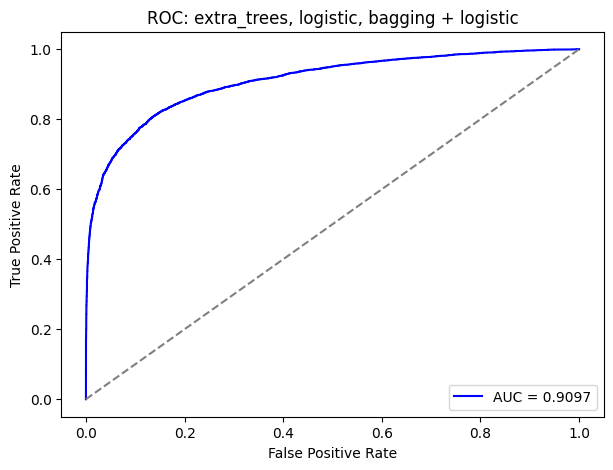

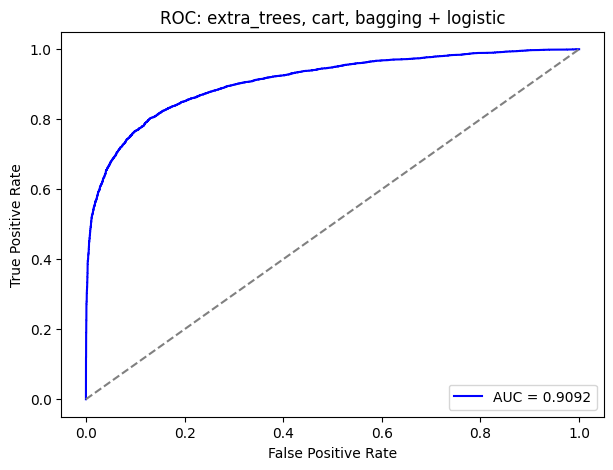

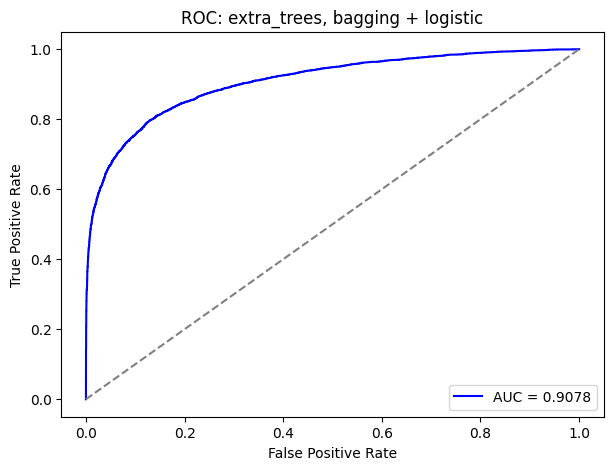

Generating predictions using extra_trees...
Generating predictions using logistic...
Generating predictions using bagging...
✅ Best stacking model saved as 'best_stacking_model.pkl'


In [ ]:
import os
import joblib
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier,
    ExtraTreesClassifier, BaggingClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score,
    classification_report, roc_curve
)

# === Load pretrained base models ===
smote_model_dir = "SMOTE Models"
trained_models = {}
for filename in os.listdir(smote_model_dir):
    if filename.endswith("_model.pkl"):
        model_name = filename.replace("_model.pkl", "")
        model_path = os.path.join(smote_model_dir, filename)
        model = joblib.load(model_path)
        assert hasattr(model, 'predict_proba'), f"{model_name} does not support predict_proba"
        trained_models[model_name] = model
print(f"Loaded {len(trained_models)} base models from '{smote_model_dir}'.")

# === Define meta models ===
meta_models = {
    'logistic': LogisticRegression(max_iter=5000, random_state=42),
    'random_forest': RandomForestClassifier(random_state=42),
    'knn': KNeighborsClassifier(),
    'gradient_boosting': GradientBoostingClassifier(random_state=42),
    'cart': DecisionTreeClassifier(random_state=42),
    'extra_trees': ExtraTreesClassifier(random_state=42),
    'bagging': BaggingClassifier(random_state=42),
}

# === Define stacking experiment class ===
class BinaryStackingClassifierExperiment:
    def __init__(self, trained_models, meta_models, random_state=42, verbose=False):
        self.trained_models = trained_models
        self.meta_models = meta_models
        self.random_state = random_state
        self.verbose = verbose
        self.results = []

    def _get_base_predictions(self, X, selected_models):
        predictions = np.zeros((X.shape[0], len(selected_models)))
        for i, (name, model) in enumerate(selected_models.items()):
            if self.verbose:
                print(f"Generating predictions using {name}...")
            try:
                prob = model.predict_proba(X)[:, 1]
            except AttributeError:
                if hasattr(model, "decision_function"):
                    prob = model.decision_function(X)
                    prob = (prob - prob.min()) / (prob.max() - prob.min())
                else:
                    prob = model.predict(X)
                    prob = (prob - prob.min()) / (prob.max() - prob.min())
            predictions[:, i] = prob
        return predictions

    def run_experiment(self, X_train, y_train, X_test, y_test, min_models=1, max_models=3):
        X_train, X_test = np.array(X_train), np.array(X_test)
        y_train, y_test = np.array(y_train), np.array(y_test)

        if max_models is None or max_models > len(self.trained_models):
            max_models = len(self.trained_models)

        for n_models in range(min_models, max_models + 1):
            if self.verbose:
                print(f"\nTrying combinations with {n_models} base models...")

            for base_models_combo in combinations(self.trained_models.items(), n_models):
                selected_base_models = dict(base_models_combo)
                meta_features_train = self._get_base_predictions(X_train, selected_base_models)
                meta_features_test = self._get_base_predictions(X_test, selected_base_models)

                for meta_name, meta_model in self.meta_models.items():
                    if self.verbose:
                        print(f"\nTesting combination: {list(selected_base_models.keys())} + {meta_name}")

                    meta_model.fit(meta_features_train, y_train)
                    y_pred = meta_model.predict(meta_features_test)
                    y_pred_proba = meta_model.predict_proba(meta_features_test)[:, 1]

                    accuracy = accuracy_score(y_test, y_pred)
                    f1 = f1_score(y_test, y_pred)
                    roc_auc = roc_auc_score(y_test, y_pred_proba)
                    class_report = classification_report(y_test, y_pred, output_dict=True)

                    self.results.append({
                        'base_models': list(selected_base_models.keys()),
                        'n_base_models': len(selected_base_models),
                        'meta_model': meta_name,
                        'accuracy': accuracy,
                        'f1_score': f1,
                        'roc_auc': roc_auc,
                        'class_report': class_report,
                        'y_test': y_test,
                        'y_pred_proba': y_pred_proba
                    })

        return self.get_results()

    def get_results(self):
        df_results = pd.DataFrame(self.results)
        df_results = df_results.sort_values(['roc_auc'], ascending=[False])
        return df_results

    def plot_individual_roc_curves(self, top_n=3):
        df_results = self.get_results().head(top_n)

        for i, row in df_results.iterrows():
            fpr, tpr, _ = roc_curve(row['y_test'], row['y_pred_proba'])
            auc_score = row['roc_auc']

            plt.figure(figsize=(7, 5))
            plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}", color='blue')
            plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
            plt.xlabel("False Positive Rate")
            plt.ylabel("True Positive Rate")
            plt.title(f"ROC: {', '.join(row['base_models'])} + {row['meta_model']}")
            plt.legend(loc="lower right")
            plt.show()

    def print_detailed_results(self, top_n=3):
        df_results = self.get_results().head(top_n)
        for i, row in df_results.iterrows():
            print(f"\nCombination {i + 1}")
            print("=" * 50)
            print(f"Base Models: {', '.join(row['base_models'])}")
            print(f"Meta Model: {row['meta_model']}")
            print(f"Accuracy: {row['accuracy']:.4f}")
            print(f"F1-score: {row['f1_score']:.4f}")
            print(f"ROC AUC: {row['roc_auc']:.4f}")
            print("\nDetailed Classification Report:")
            report = pd.DataFrame(row['class_report']).transpose()
            print(report)
            print("\n")

# === Run the experiment ===
experiment = BinaryStackingClassifierExperiment(
    trained_models=trained_models,
    meta_models=meta_models,
    verbose=True
)

results_df = experiment.run_experiment(X_train, y_train, X_test, y_test, min_models=2, max_models=3)

# === Display top results ===
experiment.print_detailed_results(top_n=3)
experiment.plot_individual_roc_curves(top_n=3)

# === Save the best stacking model ===
best_result = experiment.get_results().iloc[0]
best_base_model_names = best_result['base_models']
best_meta_model_name = best_result['meta_model']

selected_base_models = {name: trained_models[name] for name in best_base_model_names}
selected_meta_model = meta_models[best_meta_model_name]
X_meta_train = experiment._get_base_predictions(X_train, selected_base_models)
selected_meta_model.fit(X_meta_train, y_train)

stacking_model_package = {
    'base_models': selected_base_models,
    'meta_model': selected_meta_model,
    'base_model_names': best_base_model_names,
    'meta_model_name': best_meta_model_name
}

with open("best_stacking_model.pkl", "wb") as f:
    pickle.dump(stacking_model_package, f)

print("✅ Best stacking model saved as 'best_stacking_model.pkl'")


In [ ]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix, classification_report,
    accuracy_score, f1_score, roc_auc_score,
    matthews_corrcoef, roc_curve
)

# === Create output directories ===
cf_dir = "SMOTE CF"
roc_dir = "SMOTE ROC"
os.makedirs(cf_dir, exist_ok=True)
os.makedirs(roc_dir, exist_ok=True)

# === Load best stacking model ===
with open("best_stacking_model.pkl", "rb") as f:
    stacking_model = pickle.load(f)

base_models = stacking_model['base_models']
meta_model = stacking_model['meta_model']

# === Generate meta features using pipeline-based base models ===
meta_features = np.column_stack([
    model.predict_proba(X_test)[:, 1] for model in base_models.values()
])

# === Predict with meta model ===
y_pred = meta_model.predict(meta_features)
y_prob = meta_model.predict_proba(meta_features)[:, 1]

# === Evaluation Metrics ===
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
mcc = matthews_corrcoef(y_test, y_pred)
report = classification_report(y_test, y_pred)

# === Print Results ===
print("=== Classification Report ===")
print(report)
print(f"Accuracy     : {accuracy:.4f}")
print(f"F1 Score     : {f1:.4f}")
print(f"ROC AUC      : {roc_auc:.4f}")
print(f"MCC          : {mcc:.4f}")

# === Confusion Matrix Plot ===
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
cf_path = os.path.join(cf_dir, "confusion_matrix_best_model.png")
plt.savefig(cf_path, dpi=300, bbox_inches='tight')
plt.close()
print(f"✅ Confusion Matrix saved to: {cf_path}")

# === ROC Curve Plot ===
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
roc_path = os.path.join(roc_dir, "roc_curve_best_model.png")
plt.savefig(roc_path, dpi=300, bbox_inches='tight')
plt.close()
print(f"✅ ROC Curve saved to: {roc_path}")


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.82      0.85      0.84      6981
           1       0.85      0.82      0.83      6981

    accuracy                           0.84     13962
   macro avg       0.84      0.84      0.83     13962
weighted avg       0.84      0.84      0.83     13962

Accuracy     : 0.8351
F1 Score     : 0.8320
ROC AUC      : 0.9097
MCC          : 0.6706
✅ Confusion Matrix saved to: SMOTE CF/confusion_matrix_best_model.png
✅ ROC Curve saved to: SMOTE ROC/roc_curve_best_model.png


# Feature Importance Analysis

In [ ]:
import joblib

# Load your trained BaggingClassifier model
model = joblib.load("/content/SMOTE Models/bagging_model.pkl")

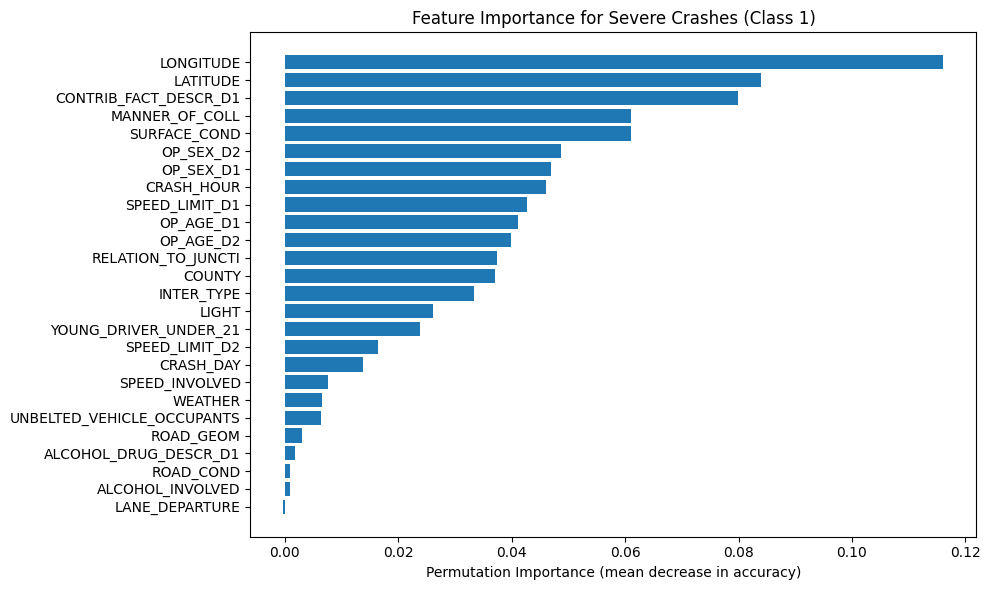

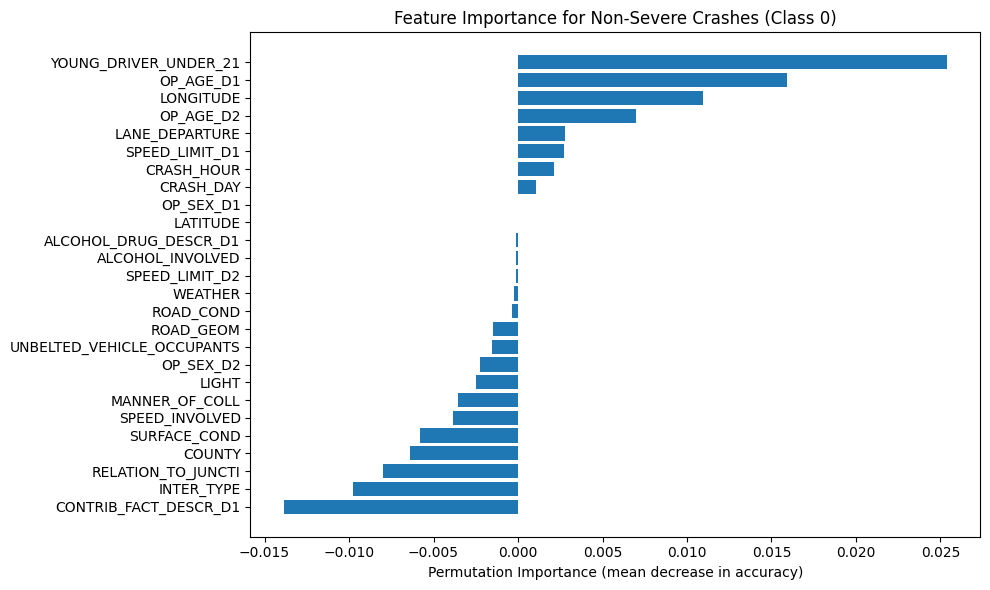

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

# Filter X_test and y_test for severe crashes
X_test_severe = X_test[y_test == 1]
y_test_severe = y_test[y_test == 1]

# Filter X_test and y_test for non-severe crashes
X_test_non_severe = X_test[y_test == 0]
y_test_non_severe = y_test[y_test == 0]

# Permutation importance for severe crashes
perm_severe = permutation_importance(model, X_test_severe, y_test_severe, n_repeats=30, random_state=42, n_jobs=-1)
perm_severe_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': perm_severe.importances_mean
}).sort_values(by='Importance', ascending=False)

# Permutation importance for non-severe crashes
perm_non_severe = permutation_importance(model, X_test_non_severe, y_test_non_severe, n_repeats=30, random_state=42, n_jobs=-1)
perm_non_severe_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': perm_non_severe.importances_mean
}).sort_values(by='Importance', ascending=False)

# --- Plot for severe crashes ---
plt.figure(figsize=(10, 6))
plt.barh(perm_severe_df['Feature'], perm_severe_df['Importance'])
plt.xlabel('Permutation Importance (mean decrease in accuracy)')
plt.title('Feature Importance for Severe Crashes (Class 1)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# --- Plot for non-severe crashes ---
plt.figure(figsize=(10, 6))
plt.barh(perm_non_severe_df['Feature'], perm_non_severe_df['Importance'])
plt.xlabel('Permutation Importance (mean decrease in accuracy)')
plt.title('Feature Importance for Non-Severe Crashes (Class 0)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
